<a href="https://colab.research.google.com/github/mikexcohen/Statistics_book/blob/main/stats_ch03_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern statistics: Intuition, Math, Python, R
## Mike X Cohen (sincxpress.com)
#### https://www.amazon.com/dp/B0CQRGWGLY
#### Code for chapter 3 (visualization)

---

# About this code file:

### This notebook will reproduce most of the figures in this chapter (some figures were made in Inkscape), and illustrate the statistical concepts explained in the text. The point of providing the code is not just for you to recreate the figures, but for you to modify, adapt, explore, and experiment with the code.

### Solutions to all exercises are at the bottom of the notebook.

#### This code was written in google-colab. The notebook may require some modifications if you use a different IDE.

In [1]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon # to create patches

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Figure 3.2: The math of the heart :)

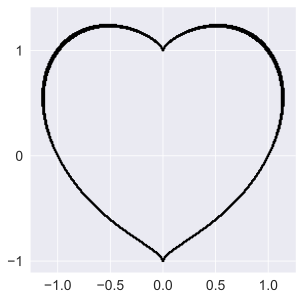

In [3]:
import sympy as sym

x,y = sym.symbols('x,y')
expr = (x**2 + y**2 - 1)**3 - x**2 * y**3

# just need the output, not the plot
h = sym.plot_implicit(expr,show=False)

# grab midpoints of intervals and plot those
data = np.array([(x_int.mid, y_int.mid) for x_int, y_int in h[0].get_points()[0]])
plt.plot(data[:,0],data[:,1],'k.',markersize=2)
plt.yticks([-1,0,1])
plt.axis('square')

plt.savefig('vis_heart.png')
plt.show()

# Figure 3.3: Bar plot of news sources

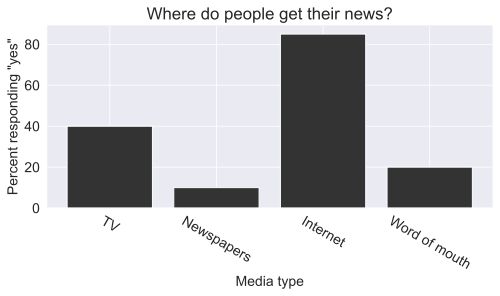

In [6]:
# specify the bar heights and labels
news_sources = [40,10,85,20]
source_labels = ['TV','Newspapers','Internet','Word of mouth']

# show the bar plot
plt.figure(figsize=(8,3.3))
plt.bar(source_labels,news_sources,color=[.2,.2,.2])

# make the graph look a bit nicer
plt.title('Where do people get their news?',loc='center')
plt.ylabel('Percent responding "yes"')
plt.xlabel('Media type')
plt.xticks(rotation=-30)

plt.savefig('vis_barplot_news1.png',bbox_inches='tight')
plt.show()

# Figure 3.4: Margin figure of bar plot

In [ ]:
Y = [1,4,3,9] # bar heights
X = [0,1,3,4] # bar locations

plt.figure(figsize=(5,2.5))
plt.bar(X,Y,color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('vis_barplot_basic.png')
plt.show()

# Figure 3.5: Grouped bar plots

In [ ]:
news_sources = np.array([[12,17,95,35],
                         [90,40,50,25]] )
agegroups = ['Millennials','Boomers']

_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].bar(np.arange(4)-.2,news_sources[0],width=.4,color='k')
axs[0].bar(np.arange(4)+.2,news_sources[1],width=.4,color='gray')
axs[0].set(xlabel='Media type',ylabel='Percentage responding "yes"',xticks=np.arange(4))
axs[0].set_xticklabels(source_labels,rotation=-30)
axs[0].legend(agegroups)
axs[0].set_title(r'$\bf{A}$)  Grouped by news source')


offset = [-.3,-.1,.1,.3]
hatches = 'xo-|' # "hatch" is the fill shape
for i in range(4):
  axs[1].bar(np.arange(2)+offset[i],news_sources[:,i],width=.2,
             hatch=hatches[i],color=[.8,.8,.8],edgecolor='k')

# Note about color: Unless you need grayscale, color is nicer-looking than hatches:
# for i in range(4): axs[1].bar(np.arange(2)+offset[i],news_sources[:,i],width=.2)

axs[1].set(xlabel='Generation',ylabel='Percentage responding "yes"',xticks=np.arange(2))
axs[1].set_xticklabels(agegroups)
axs[1].legend(source_labels,fontsize=10)
axs[1].set_title(r'$\bf{B}$)  Grouped by generation')


plt.tight_layout()
plt.savefig('vis_barplot_news2.png')
plt.show()

# Figure 3.6: Note about bars from matrices

In [ ]:
# data are observations (rows) X features (columns)
m = [ [2,5,4,3], [1,1,8,6] ]
m = [ [10,12,90,35], [85,15,50,10] ]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))


### show data as an image
# conceptualizing the data as <row> groups of <columns>
ax[0,0].imshow(m,cmap='gray',vmin=-30,vmax=90)

# add numerical labels
for i in range(len(m)):
  for j in range(len(m[0])):
    ax[0,0].text(j,i,m[i][j],fontsize=30
                 ,horizontalalignment='center',verticalalignment='center')
ax[0,0].set(xticks=[],yticks=[])
ax[0,0].set(xlabel='Features',ylabel='Observations')


# now other orientation (features X observations)
ax[0,1].imshow(np.array(m).T,cmap='gray',vmin=-30,vmax=90)
for i in range(len(m)):
  for j in range(len(m[0])):
    ax[0,1].text(i,j,m[i][j],fontsize=30
                 ,horizontalalignment='center',verticalalignment='center')
ax[0,1].set(xticks=[],yticks=[])
ax[0,1].set_xlabel('Observations')
ax[0,1].set_ylabel('Features')




#### now for bar plots using pandas dataframe
df = pd.DataFrame(m,columns=['A','B','C','D'])
h = df.plot(ax=ax[1,0],kind='bar',rot=0)
ax[1,0].set_ylim([0,100])

# add text labels
for p in h.patches:
  h.annotate(p.get_height(), [p.get_x()+.06, p.get_height()+1],
             horizontalalignment='center',fontsize=12)

## add text/number indices to rows/columns
for i,l in zip(range(4),'ABCD'):
  ax[0,0].text(i,-.6,l,ha='center',fontsize=16)
  ax[0,1].text(1.65,i,l,ha='center',fontsize=16)

for i in range(2):
  ax[0,0].text(3.65,i,str(i),va='center',ha='center',fontsize=16)
  ax[0,1].text(i,-.6,str(i),ha='center',fontsize=16)


ax[1,0].set_xlabel('Index')

h = df.T.plot(ax=ax[1,1],kind='bar',rot=0)
ax[1,1].set_ylim([0,100])
for p in h.patches:
  h.annotate(p.get_height(), [p.get_x()+.12, p.get_height()+1],
             horizontalalignment='center',fontsize=12)

ax[1,1].set_xlabel('Index')

plt.tight_layout()
plt.savefig('vis_barplotOrientations.png')
plt.show()

# Figure 3.8: Pie chart

In [ ]:
# data
mostNews = [ 15,5,70,10 ]

# make the pie chart
plt.figure(figsize=(6.3,6.3))
plt.pie(mostNews,labels=source_labels,autopct='%.0f%%',
        radius=1.2,wedgeprops={'edgecolor':'k'})

plt.tight_layout()
plt.savefig('vis_pie.png')
plt.show()

# Figure 3.9: Box plot

In [ ]:
# random data with an outlier
data = np.random.randn(100)
data[data>2] = 1
data[data<-2] = -1
data[-1] = 3 # force one outlier



plt.figure(figsize=(2,4))

# draw the boxplot and make some color adjustments
h = plt.boxplot(data,patch_artist=True)
h['boxes'][0].set(color='k')
h['medians'][0].set(color='w')

plt.xlim([.8,1.5])
plt.xticks([])
plt.ylabel('Data values')

plt.tight_layout()
plt.savefig('vis_boxplotBasic.png')
plt.show()

# Figure 3.10: Box plots for distribution characteristics

In [ ]:
# box plot
data = np.hstack( (np.random.normal(loc=100,size=(200,1),scale=10),
                   np.random.normal(loc=100,size=(200,1),scale=2) ))

# draw the boxplot and make some color adjustments
plt.figure(figsize=(3,3))
h = plt.boxplot(data,patch_artist=True,widths=.7)
for (b,m) in zip(h['boxes'],h['medians']):
  b.set(color='k')
  m.set(color='w')

plt.xlim([.5,2.5])
plt.xticks(range(1,3),['A','B'])
plt.tight_layout()
plt.savefig('vis_boxplotComp.png')
plt.show()

# Figure 3.11: Histogram

In [ ]:
# version 1

X = [ 1,2,2,3,3,4,5,5,5,5,6,7,7,7,8,8,9 ]

plt.figure(figsize=(8,4))
plt.hist(X,bins=len(set(X)),color='gray',edgecolor='k')
plt.xticks(np.arange(np.min(X),np.max(X)+1))
plt.xlabel('Numerical value')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('vis_histOfInts1.png')
plt.show()

# Figure 3.12

In [ ]:
# using different boundaries
plt.figure(figsize=(8,4))
plt.hist(X,bins=np.arange(.5,9.51,step=1),color='gray',edgecolor='k')
plt.xticks(np.arange(np.min(X),np.max(X)+1))
plt.xlabel('Numerical value')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('vis_histOfInts2.png')
plt.show()

In [ ]:
# the table of bin boundaries
_,x1 = np.histogram(X,bins=len(set(X)))
_,x2 = np.histogram(X,np.arange(.5,9.51,step=1))

for i in range(len(x1)-1):
  print(f'Bin {i+1}:  [{x1[i]:.1f} , {x1[i+1]:.1f}]   [{x2[i]:.1f} , {x2[i+1]:.1f}]')

# Figure 3.14: Histogram of mongoose lengths

In [ ]:
# distribution of mongooses' lengths
mongooses = np.arctanh(np.random.uniform(-.75,.75,size=500))*15+40

plt.figure(figsize=(8,4))
plt.hist(mongooses,bins=30,color='gray',edgecolor='k')

plt.xlabel('Length (cm)')
plt.ylabel('Count')
plt.title('Lengths of Babylonian mongooses',loc='center')

plt.tight_layout()
plt.savefig('vis_mongeese.png')
plt.show()

# Figure 3.15: Histograms with different bins

In [ ]:
_,axs = plt.subplots(1,2,figsize=(8,3))

axs[0].hist(mongooses,bins=3,color='gray',edgecolor='k')
axs[0].set_title(r'$\bf{A}$)  Histogram with 3 bins')

axs[1].hist(mongooses,bins=300,color='gray',edgecolor='k')
axs[1].set_title(r'$\bf{B}$)  With 300 bins')

# stylizing
for a in axs:
  a.set_xlabel('Length (cm)')
  a.set_ylabel('Count')

plt.tight_layout()
plt.savefig('vis_mongeese_binoptions.png')
plt.show()

# Figure 3.16: Distribution showing tails

In [ ]:
import scipy.stats as stats
# create a Gaussian probability curve
x = np.linspace(-4,4,401)
gpdf = stats.norm.pdf(x)

# the find the indices of the 2.5% and 97.5%
lbndi = np.argmin(np.abs(x-stats.norm.ppf(.05)))
ubndi = np.argmin(np.abs(x-stats.norm.ppf(1-.05)))


# plot the probability function and the vertical lines
_,ax = plt.subplots(1,figsize=(5,4))
ax.plot(x,gpdf,'k',linewidth=2)
ax.set(xlim=x[[0,-1]],ylim=[0,.42],xticks=[],yticks=[],
       xlabel='Data value',ylabel='Proportion')




# now create patches for the rejected area
# Note: fill_between() is usually more convenient (and I use it later); here I show how to add a polygon patch FYI.
from matplotlib.patches import Polygon

dots = np.zeros((lbndi+2,2))
for i in range(lbndi+1):
  dots[i,:] = x[i],gpdf[i]
dots[-1,:] = x[lbndi],0
ax.add_patch(Polygon(dots,facecolor='k',alpha=.4))

# repeat for the right lobe
dots = np.zeros((len(x)-ubndi+1,2))
for i in range(ubndi,len(x)):
  dots[i-ubndi,:] = x[i],gpdf[i]
dots[-1,:] = x[ubndi],0
ax.add_patch(Polygon(dots,facecolor='k',alpha=.4))

# annotations
tailx = np.argmin(np.abs(x--2.2))
ax.annotate('Left tail',xy=(x[tailx],gpdf[tailx]+.01),
            xytext=(x[tailx]-1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)
tailx = np.argmin(np.abs(x-2.2))
ax.annotate('Right tail',xy=(x[tailx],gpdf[tailx]+.01),
            xytext=(x[tailx]+1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)

ax.axis('off')
plt.tight_layout()
plt.savefig('vis_distribution_tails.png')
plt.show()

# Figure 3.17: Histogram raw counts vs proportion

In [ ]:
data = np.random.rand(200)**2

# extract histogram data
counts,x = np.histogram(data,bins='fd')
binCents = (x[:-1]+x[1:])/2

# convert counts to proportion
proportion = counts / np.sum(counts)

_,axs = plt.subplots(1,2,figsize=(8,4))

axs[0].bar(binCents,counts,width=.12,color='gray',edgecolor='k')
axs[0].set_title(r'$\bf{A}$)  Raw counts')
axs[0].set_ylabel('Count')

axs[1].bar(binCents,proportion,width=.12,color='gray',edgecolor='k')
axs[1].set_title(r'$\bf{B}$)  Proportion')
axs[1].set_ylabel('Proportion')

plt.tight_layout()
plt.savefig('vis_histCountVsProp.png')
plt.show()

# Figure 3.19: The mongooses experiment

In [ ]:
mongooses_africa = np.arctanh(np.random.uniform(size=100)*1.5-.75)*12+37
mongooses_asia = np.arctanh(np.random.uniform(size=500)*1.5-.75)*15+42

# create common bin boundaries across both datasets
alldata = np.concatenate((mongooses_africa,mongooses_asia))
binbounds = np.linspace(np.min(alldata),np.max(alldata),30)

_,axs = plt.subplots(2,2,figsize=(8,6))

# top two panels show raw histograms
axs[0,0].hist(mongooses_africa,bins=binbounds,color='gray',edgecolor='k')
axs[0,0].set_xlim([binbounds[0]-1,binbounds[-1]+1])
axs[0,0].set_ylim([0,30]) # ylim hard-coded based on N and bins
axs[0,0].set_title(r'$\bf{A}$)  Counts: African mons')

axs[0,1].hist(mongooses_asia,bins=binbounds,color='gray',edgecolor='k')
axs[0,1].set_xlim([binbounds[0]-1,binbounds[-1]+1])
axs[0,1].set_ylim([0,30])
axs[0,1].set_title(r'$\bf{B}$)  Counts: Asian mons')

# bottom row for proportion
axs[1,0].hist(mongooses_africa,bins=binbounds,density=True,
              color='gray',edgecolor='k')
axs[1,0].set_xlim([binbounds[0]-1,binbounds[-1]+1])
axs[1,0].set_ylim([0,.1])
axs[1,0].set_title(r'$\bf{C}$)  Proportion: African mons')

axs[1,1].hist(mongooses_asia,bins=binbounds,density=True,
              color='gray',edgecolor='k')
axs[1,1].set_xlim([binbounds[0]-1,binbounds[-1]+1])
axs[1,1].set_ylim([0,.1])
axs[1,1].set_title(r'$\bf{D}$)  Proportion: Asian mons')

plt.tight_layout()
plt.savefig('vis_mongeese_rawProp.png')
plt.show()

# Figure 3.21: Violin plot from histogram

In [ ]:
# the data
x1 = np.random.randn(100)-.5
x2 = np.random.randn(100)+.5
X = np.concatenate((x1,x2))

_,axs = plt.subplots(1,4,figsize=(14,4))

# regular histogram
axs[0].hist(X,bins='fd',color='gray',edgecolor='k')
axs[0].set_title(r'$\bf{A}$)  Step 1: histogram')
axs[0].set_ylim([0,40])
axs[0].set_xlabel('Data value')
axs[0].set_ylabel('Count')

# smooth interpolation of histogram
y,x = np.histogram(X,bins='fd')
x = (x[:-1]+x[1:])/2

from scipy import interpolate
interpF = interpolate.interp1d(x,y,kind='cubic')
xx = np.linspace(x[0],x[-1],100)
yy = interpF(xx)


axs[1].plot(xx,yy,'k')
axs[1].set_xlabel('Data value')
axs[1].set_ylabel('Count')
axs[1].set_ylim([0,40])
axs[1].set_title(r'$\bf{B}$)  Step 2: interpolate')


# now for the violin plot (as a dataframe to use seaborn)
df = pd.DataFrame(X)
sns.violinplot(data=df,palette='gray',ax=axs[2])
sns.stripplot(data=df,ax=axs[2],palette='dark:#b2b2b2')
axs[2].set_xlabel('Count (norm.)')
axs[2].set_ylabel('Data value')
axs[2].set_title(r'$\bf{C}$)  Step 3: rotate/mirror')




# NOTE: The code below is actually a solution to Exercise 7, so don't inspect this code
#       too carefully if you want the challenge of solving it yourself :)
df = pd.DataFrame(np.vstack((x1,x2)).T,columns = ['x1','x2'])
df_all = pd.DataFrame( pd.concat((df['x1'],df['x2']),axis=0),columns=['y'])
df_all['distr'] = 'x2'
df_all['distr'][:len(df)] = 'x1' # note: you can safely ignore the warning that this line produces
df_all[''] = ' '
sns.violinplot(data=df_all,x='',y='y',palette='gray',ax=axs[3],split=True,hue='distr')
axs[3].legend_.remove()
axs[3].set(xlim=[-.75,.75],ylabel='Data value')
axs[3].set_title(r'$\bf{D}$)  Asymmetric violin')


plt.tight_layout()
plt.savefig('vis_makeAviolin.png')
plt.show()

# Figure 3.22: Linear vs logarithmic plot

In [ ]:
# simple data... just a line!
y = np.linspace(1,10**4)

# create a figure
_,axs = plt.subplots(1,3,figsize=(12,3.5))

# visualization
for i in range(3):

  # plot the line (same data in all plots!)
  axs[i].plot(y,'k',linewidth=2)

  # adjust the axes for the log plots
  if i>0:
    axs[i].set_yscale('log')
    t = r'$\bf{' + ['B','C'][i-1] + '}$)  Log scaling'
    axs[i].set_title(t)
    axs[i].set_ylabel('Spacing by multiplication')



# log scaling is in scientific notation by default;
# here I change it to scalar format.
from matplotlib.ticker import ScalarFormatter
axs[1].yaxis.set_major_formatter(ScalarFormatter())

# labels
axs[0].set_title(r'$\bf{A}$)  Linear scaling')
axs[0].set_ylabel('Spacing by addition')


plt.tight_layout()
plt.savefig('vis_linVlog_line.png')
plt.show()

# Figure 3.24: Radial plots

In [ ]:
# data (from https://www.timeanddate.com/weather/%403841798/climate)
tempC = [ 26,25,23,19,15,11,11,13,16,19,22,25 ]
months = [ 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]

# angles for plotting
theta = np.linspace(0,2*np.pi,len(months)+1)

# repeat first data point so the line wraps around
tempC.append(tempC[0])


## draw the data
ax = plt.subplot(111,polar=True)
ax.plot(theta,tempC,'ko-')
ax.fill(theta,tempC,'k',alpha=.1)

# make the plot look nicer
ax.set_xticks(theta[:-1])
ax.set_xticklabels(months)
ax.set_yticks([10,20,30])
ax.set_ylim([0,30])
ax.set_title('High temps ($^{\circ}$C) near Patagonia',y=1.15,loc='center')


plt.tight_layout()
plt.savefig('vis_radialGood.png')
plt.show()

# Figure 3.25: When not to use a radial plot

In [ ]:
# fake data
data = {
    'Horror' : 8 ,
    'Romcom' : 1 ,
    'Scifi'  : 9 ,
    'Action' : 7 ,
    'Anime'  : 3 ,
    'Docu'   : 6
}

# angles for plotting
theta = np.linspace(0,2*np.pi,len(data)+1)

# repeat first data point so the line wraps around
ratings = list(data.values())
ratings.append(ratings[0])

## draw the data
ax = plt.subplot(111,polar=True)
ax.plot(theta,ratings,'ko-')
ax.fill(theta,ratings,'k',alpha=.1)

# make the plot look nicer
ax.set_xticks(theta[:-1])
ax.set_xticklabels(data.keys())
ax.set_yticks([5,10])
ax.set_ylim([0,10])
ax.set_title('Movie genre preferences',y=1.1,loc='center')


plt.tight_layout()
plt.savefig('vis_radialBad.png')
plt.show()

# Exercise 1

In [ ]:
# grouped bar plots both ways using pandas
df = pd.DataFrame( np.reshape(np.arange(12),(4,3)),
                   columns=['A','B','C'] )
df.T

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

df.plot(kind='bar',ax=axs[0],title='Grouping by columns',
        xlabel='Category',ylabel='Value',rot=0)

df.T.plot(kind='bar',ax=axs[1],title='Grouping by rows',
        xlabel='Category',ylabel='Value',rot=0)
plt.show()

# Exercise 2 (Figure 3.7)

In [ ]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
  # You can implement the equation directly based on mean=0 and std=1
  data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

  # or you can specify mu and sigma as parameters
  # data[:,i] = np.random.normal(loc=(i+1)**2, scale=30*(2*i/(n-1)-1)**2, size=m)

In [ ]:
# show the bars!

fig,ax = plt.subplots(1,3,figsize=(10,3))

# 'naked' bars
ax[0].bar(range(n),np.mean(data,axis=0),color='k')
ax[0].set_xticks(range(n))
ax[0].set_title(r'$\bf{A}$)  Bar plot')

# just the error bars
ax[1].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),
               marker='.',linestyle='',color='k')
ax[1].set_xticks(range(n))
ax[1].set_title(r'$\bf{B}$)  Error plot')

# both
ax[2].bar(range(n),np.mean(data,axis=0),color='gray')
ax[2].set_xticks(range(n))
ax[2].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
ax[2].set_title(r'$\bf{C}$)  Error bar plot')

plt.tight_layout()
plt.savefig('vis_errorbar.png')
plt.show()

# Exercise 3

In [ ]:
# A pie chart is appropriate here because the data
# can be converted to proportion (although they are
# not given as proportion, so transformation is needed).

# data and labels, specified in a dictionary
d = {
    'Chocolate': 24,
     'Vanilla' : 16,
  'Strawberry' :  7,
   'Pistachio' : 16
   }


# note that plt.pie() automatically computes proportion
plt.pie(d.values(), labels=d.keys(),
        explode=[0,.1,0,.15],autopct='%.1f%%',radius=1.2 )

# you can also do it manually:
# x = list( d.values() )
# x = x/np.sum(x)
# plt.pie(x, labels=d.keys() )

plt.savefig('vis_ex_pie.png')
plt.show()

# Exercise 4

In [ ]:
data = np.random.gamma(2,2,size=500)

# raw histogram values
y,x = np.histogram(data,bins=40)
x = (x[:-1]+x[1:])/2

# normalize to percent
yp = (100*y) / np.sum(y)

_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(x,y,linewidth=3,color='k')
axs[0].set_title(r'$\bf{A}$)  Counts (sum=%g)' %np.sum(y))
axs[0].set_ylabel('Counts')
axs[0].set_xlabel('Data values')
axs[0].set_xlim(x[[0,-1]])


axs[1].plot(x,yp,linewidth=3,color='k')
axs[1].set_title(r'$\bf{B}$)  Percentage (sum=%g)' %np.sum(yp))
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Data values')
axs[1].set_xlim(x[[0,-1]])

plt.savefig('vis_ex_histCountPerc.png')
plt.tight_layout()
plt.show()

# Exercise 5

In [ ]:
# parameters
N = 200 # sample sizes
k = 30 # number of bins

# create the data
d1 = np.random.randn(N) + 2
d2 = np.exp( np.random.randn(N) )

# define the bins
alldata = np.hstack((d1,d2))
bins = np.linspace(np.min(alldata),np.max(alldata),k+1)

# get histogram values using numpy
y1,x1 = np.histogram(d1,bins=bins)
y2,x2 = np.histogram(d2,bins=bins)
xx = (x1[:-1]+x1[1:])/2


### now for plotting
_,axs = plt.subplots(1,2,figsize=(10,3))

# draw the histograms using matplotlib
axs[0].hist(d1,bins=bins,label='Gaussian',alpha=.5,color=(0,0,0))
axs[0].hist(d2,bins=bins,label='Exponential',alpha=.5,color=(.6,.6,.6))
axs[0].set_title(r'$\bf{A}$) Histograms using bars')

# now draw lines
axs[1].plot(xx,y1,linewidth=3,label='Gaussian',color=(0,0,0))
axs[1].plot(xx,y2,linewidth=3,label='Exponential',color=(.6,.6,.6))
axs[1].set_title(r'$\bf{B}$) Histograms using lines')

for a in axs:
  a.set_xlabel('Data value')
  a.set_ylabel('Count')
  a.legend()


plt.tight_layout()
plt.savefig('vis_ex_histBarsLines.png')
plt.show()

# Exercise 6

In [ ]:
x = np.linspace(0,6,1001)

# plot same function in both axes
_,axs = plt.subplots(1,2,figsize=(10,4))
for i,a in enumerate(axs):
  a.plot(x,x, linewidth=2, label='$y=x$', color=[0,0,0])
  a.plot(x,np.exp(x), '--', linewidth=2, label='$y=e^x$', color=[.7,.7,.7])
  a.legend()
  a.set_title([r'$\bf{A}$)',r'$\bf{B}$)'][i] + '  ' + ['Linear','Logarithmic'][i] + ' y-axis scale')
  a.set_xlim([np.min(x),np.max(x)])


# axis-specific adjustments
axs[0].set_ylim([0,100])
axs[1].set_yscale('log')

# save and display
plt.tight_layout()
plt.savefig('vis_ex_linlog.png')
plt.show()

In [ ]:
### Comment about using -x instead of x:
# The left plot (linear scale) shows the expected result.
# The right plot (log scale) is missing the linear function.
#   This happens because the log of a negative number does not exist in the real numbers.
#   Therefore, logarithmic y-axis scaling is valid only for positive-valued data.
#

# Exercise 7

In [ ]:
# create data

df = pd.DataFrame(np.hstack((np.random.randn(123,1),np.random.rand(123,1))),
                  columns = ['norm','unif'])

_,axs = plt.subplots(1,2,figsize=(9,5))
sns.violinplot(data=df,palette='gray',ax=axs[0])
sns.stripplot(data=df,ax=axs[0],palette='dark:w')
axs[0].set(xlabel='Distribution type',ylabel='Data value',ylim=[-3.5,3.5])
axs[0].set_title(r'$\bf{A}$) Two symmetric violin plots')

# need to combine the columns into one
df_all = pd.DataFrame( pd.concat((df['norm'],df['unif']),axis=0),columns=['y'])
# and create a separate column to indicate the distribution type
df_all['distr'] = 'unif'
df_all['distr'][:len(df)] = 'norm' # note: you can safely ignore the warning that this line produces
df_all[''] = ' '

# now we can create a split violin plot
sns.violinplot(data=df_all,x='',y='y',palette='gray',
               ax=axs[1],split=True,hue='distr')
axs[1].set(xlim=[-.5,.5],ylabel='Data value',ylim=[-3.5,3.5])
axs[1].set_title(r'$\bf{B}$) One asymmetric violin plot')

plt.tight_layout()
plt.savefig('vis_ex7.png')
plt.show()

# Exercise 8

In [ ]:
# data (from https://www.timeanddate.com/weather/%403841798/climate)
tempC = [ 26,25,23,19,15,11,11,13,16,19,22,25 ]
months = [ 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]

# import to pandas
df = pd.DataFrame(data=list(zip(tempC,months)),columns=['Temp','Month'])

# import plotly
import plotly.express as px

# plotly! (this produces a basic radial plot; you can explore line_polar() for more customizations)
fig = px.line_polar(df,r='Temp',theta='Month',line_close=True)
fig.show()

# Note: If you get a warning message about pandas.concat, this is coming from inside the line_polar function.
#       I'll update the code if this ends up breaking. For now, ignore the warning.